# Common imports

In [1]:
%matplotlib inline
import os
import sys
import glob
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Provided functions
### Image loading and saving

In [2]:
def LoadFaceImages(pathname, subject_name, num_images):
    """
    Load the set of face images.  
    The routine returns
        ambimage: image illuminated under the ambient lighting
        imarray: a 3-D array of images, h x w x Nimages
        lightdirs: Nimages x 3 array of light source directions
    """

    def load_image(fname):
        return np.asarray(Image.open(fname))

    def fname_to_ang(fname):
        yale_name = os.path.basename(fname)
        return int(yale_name[12:16]), int(yale_name[17:20])

    def sph2cart(az, el, r):
        rcos_theta = r * np.cos(el)
        x = rcos_theta * np.cos(az)
        y = rcos_theta * np.sin(az)
        z = r * np.sin(el)
        return x, y, z

    ambimage = load_image(
        os.path.join(pathname, subject_name + '_P00_Ambient.pgm'))
    im_list = glob.glob(os.path.join(pathname, subject_name + '_P00A*.pgm'))
    if num_images <= len(im_list):
        im_sub_list = np.random.choice(im_list, num_images, replace=False)
    else:
        print(
            'Total available images is less than specified.\nProceeding with %d images.\n'
            % len(im_list))
        im_sub_list = im_list
    im_sub_list.sort()
    imarray = np.stack([load_image(fname) for fname in im_sub_list], axis=-1)
    Ang = np.array([fname_to_ang(fname) for fname in im_sub_list])

    x, y, z = sph2cart(Ang[:, 0] / 180.0 * np.pi, Ang[:, 1] / 180.0 * np.pi, 1)
    lightdirs = np.stack([y, z, x], axis=-1)
    return ambimage, imarray, lightdirs

In [3]:
def save_outputs(subject_name, albedo_image, surface_normals):
    im = Image.fromarray((albedo_image*255).astype(np.uint8))
    im.save("%s_albedo.jpg" % subject_name)
    im = Image.fromarray((surface_normals[:,:,0]*128+128).astype(np.uint8))
    im.save("%s_normals_x.jpg" % subject_name)
    im = Image.fromarray((surface_normals[:,:,1]*128+128).astype(np.uint8))
    im.save("%s_normals_y.jpg" % subject_name)
    im = Image.fromarray((surface_normals[:,:,2]*128+128).astype(np.uint8))
    im.save("%s_normals_z.jpg" % subject_name)

### Plot the height map

In [4]:
def set_aspect_equal_3d(ax):
    """https://stackoverflow.com/questions/13685386"""
    """Fix equal aspect bug for 3D plots."""
    xlim = ax.get_xlim3d()
    ylim = ax.get_ylim3d()
    zlim = ax.get_zlim3d()
    from numpy import mean
    xmean = mean(xlim)
    ymean = mean(ylim)
    zmean = mean(zlim)
    plot_radius = max([
        abs(lim - mean_)
        for lims, mean_ in ((xlim, xmean), (ylim, ymean), (zlim, zmean))
        for lim in lims
    ])
    ax.set_xlim3d([xmean - plot_radius, xmean + plot_radius])
    ax.set_ylim3d([ymean - plot_radius, ymean + plot_radius])
    ax.set_zlim3d([zmean - plot_radius, zmean + plot_radius])


def display_output(albedo_image, height_map):
    fig = plt.figure()
    plt.imshow(albedo_image, cmap='gray')
    plt.axis('off')
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.view_init(20, 20)
    X = np.arange(albedo_image.shape[0])
    Y = np.arange(albedo_image.shape[1])
    X, Y = np.meshgrid(Y, X)
    H = np.flipud(np.fliplr(height_map))
    A = np.flipud(np.fliplr(albedo_image))
    A = np.stack([A, A, A], axis=-1)
    ax.xaxis.set_ticks([])
    ax.xaxis.set_label_text('Z')
    ax.yaxis.set_ticks([])
    ax.yaxis.set_label_text('X')
    ax.zaxis.set_ticks([])
    ax.yaxis.set_label_text('Y')
    surf = ax.plot_surface(
        H, X, Y, cmap='gray', facecolors=A, linewidth=0, antialiased=False)
    set_aspect_equal_3d(ax)
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.view_init(-20, -20)
    X = np.arange(albedo_image.shape[0])
    Y = np.arange(albedo_image.shape[1])
    X, Y = np.meshgrid(Y, X)
    H = np.flipud(np.fliplr(height_map))
    A = np.flipud(np.fliplr(albedo_image))
    A = np.stack([A, A, A], axis=-1)
    ax.xaxis.set_ticks([])
    ax.xaxis.set_label_text('Z')
    ax.yaxis.set_ticks([])
    ax.yaxis.set_label_text('X')
    ax.zaxis.set_ticks([])
    ax.yaxis.set_label_text('Y')
    surf = ax.plot_surface(
        H, X, Y, cmap='gray', facecolors=A, linewidth=0, antialiased=False)
    set_aspect_equal_3d(ax)
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.view_init( 20,40)
    X = np.arange(albedo_image.shape[0])
    Y = np.arange(albedo_image.shape[1])
    X, Y = np.meshgrid(Y, X)
    H = np.flipud(np.fliplr(height_map))
    A = np.flipud(np.fliplr(albedo_image))
    A = np.stack([A, A, A], axis=-1)
    ax.xaxis.set_ticks([])
    ax.xaxis.set_label_text('Z')
    ax.yaxis.set_ticks([])
    ax.yaxis.set_label_text('X')
    ax.zaxis.set_ticks([])
    ax.yaxis.set_label_text('Y')
    surf = ax.plot_surface(
        H, X, Y, cmap='gray', facecolors=A, linewidth=0, antialiased=False)
    set_aspect_equal_3d(ax)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca(projection='3d')
    ax.view_init(40, 20)
    X = np.arange(albedo_image.shape[0])
    Y = np.arange(albedo_image.shape[1])
    X, Y = np.meshgrid(Y, X)
    H = np.flipud(np.fliplr(height_map))
    A = np.flipud(np.fliplr(albedo_image))
    A = np.stack([A, A, A], axis=-1)
    ax.xaxis.set_ticks([])
    ax.xaxis.set_label_text('Z')
    ax.yaxis.set_ticks([])
    ax.yaxis.set_label_text('X')
    ax.zaxis.set_ticks([])
    ax.yaxis.set_label_text('Y')
    surf = ax.plot_surface(
        H, X, Y, cmap='gray', facecolors=A, linewidth=0, antialiased=False)
    set_aspect_equal_3d(ax)

### Plot the surface norms. 

In [5]:
def plot_surface_normals(surface_normals):
    """
    surface_normals: h x w x 3 matrix.
    """
    fig = plt.figure()
    ax = plt.subplot(1, 3, 1)
    ax.axis('off')
    ax.set_title('X')
    im = ax.imshow(surface_normals[:,:,0])
    ax = plt.subplot(1, 3, 2)
    ax.axis('off')
    ax.set_title('Y')
    im = ax.imshow(surface_normals[:,:,1])
    ax = plt.subplot(1, 3, 3)
    ax.axis('off')
    ax.set_title('Z')
    im = ax.imshow(surface_normals[:,:,2])

# Your implementation

In [6]:
def preprocess(ambimage, imarray):
    """
    preprocess the data: 
        1. subtract ambient_image from each image in imarray.
        2. make sure no pixel is less than zero.
        3. rescale values in imarray to be between 0 and 1.
    Inputs:
        ambimage: h x w
        imarray: h x w x Nimages
    Outputs:
        processed_imarray: h x w x Nimages
    """
    ambient_image = ambimage.reshape(ambimage.shape[0],ambimage.shape[1],1)
#     print(imarray)
    imarray = imarray - ambient_image
    imarray = np.maximum(imarray,0)
#     print(imarray)
    imarray = imarray.astype(np.float32)
    processed_imarray = imarray/255.0
#     print(processed_imarray.shape)
    return processed_imarray

In [7]:
def photometric_stereo(imarray, light_dirs):
    """
    Inputs:
        imarray:  h x w x Nimages
        light_dirs: Nimages x 3
    Outputs:
        albedo_image: h x w
        surface_norms: h x w x 3
    """
    h,w,d = imarray.shape
    surface_normals = np.zeros([h,w,3])
    resp_im = imarray.reshape(h*w,d).T
    g = np.linalg.lstsq(light_dirs, resp_im)
    g = g[0].reshape(3,h,w)
    fx = g[0,:,:]/g[2,:,:]
    fy = g[1,:,:]/g[2,:,:]
    temp = 1/np.sqrt(fx*fx+fy*fy+1)
    surface_normals[:,:,0] = temp * fx
    surface_normals[:,:,1] = temp * fy
    surface_normals[:,:,2] = temp * 1
    albedo_image = (g.transpose((1,2,0))/surface_normals)[:,:,0]
    return albedo_image, surface_normals

In [8]:
def get_surface(surface_normals, integration_method):
    """
    Inputs:
        surface_normals:h x w x 3
        integration_method: string in ['average', 'column', 'row', 'random']
    Outputs:
        height_map: h x w
    """
    start = time.time()
    h,w,d = surface_normals.shape
    fx = surface_normals[:,:,0]/surface_normals[:,:,2]
    fy = surface_normals[:,:,1]/surface_normals[:,:,2]
    cumsum_x = np.cumsum(fx,axis=1)
    cumsum_y = np.cumsum(fy,axis=0)
#     print(cumsum_x.shape)
#     print(cumsum_y.shape)
    tx = cumsum_x[0,:]
    ty = cumsum_y[:,0]
#     print(tx.shape)
#     print(ty.shape)
    tx = np.tile(tx,(192,1))
    ty = np.tile(ty,(168,1))
    ty = ty.T
#     print(tx.shape)
#     print(ty.shape)
#     print(ty)
#     height_map_row = tx + cumsum_y
#     height_map_column = ty + cumsum_x
#     height_map_average = (height_map_row + height_map_column)/2
#     height_map_random = get_random(fx,fy,h,w)
    if integration_method ==  'row':
        height_map_row = tx + cumsum_y
        height_map = height_map_row
    if integration_method ==  'column':
        height_map_column = ty + cumsum_x
        height_map = height_map_column
    if integration_method ==  'average':
        height_map_row = tx + cumsum_y
        height_map_column = ty + cumsum_x
        height_map_average = (height_map_row + height_map_column)/2
        height_map = height_map_average
    if integration_method ==  'random':
        height_map_random = get_random(fx,fy,h,w)
        height_map = height_map_random
    end = time.time()
    print('The excution time of ',integration_method, 'is:',end-start)
    return height_map

In [9]:
def get_random(fx,fy,h,w):
#     height_map_random = np.array((h,w))
    height_map_random = np.zeros([h,w])
#     sum1 = np.zeros([h,w])
    for m in range(10):
        for i in range(h):
            for j in range(w):
                a=0
                b=0
                c=np.random.random_sample()
                if(c< 0.5):
                    height_map_random[i,j] = height_map_random[i,j] + fy[0,0]
                else:
                    height_map_random[i,j] = height_map_random[i,j] + fx[0,0]
                while(i>a or j>b):
                    c=np.random.random_sample()
                    if (c< 0.5 and i >a):
                        a = a + 1
                        height_map_random[i,j] = height_map_random[i,j] + fy[a,b]
                    elif(c>=0.5 and j >b):
                        b = b + 1
                        height_map_random[i,j] = height_map_random[i,j] + fx[a,b]
                    elif(i<=a):
                        b = b + 1
                        height_map_random[i,j] = height_map_random[i,j] + fx[a,b]
                    elif(j<=b):
                        a = a + 1
                        height_map_random[i,j] = height_map_random[i,j] + fy[a,b]
                    else:
                        continue
    return height_map_random/10.0

# Main function

In [10]:
root_path = 'C:/Users/n551/Desktop/ECE549/MP/MP1/croppedyale/'
subject_name = 'yaleB01'
integration_method = 'average'
save_flag = True

full_path = '%s%s' % (root_path, subject_name)
ambient_image, imarray, light_dirs = LoadFaceImages(full_path, subject_name,
                                                    64)

processed_imarray = preprocess(ambient_image, imarray)

albedo_image, surface_normals = photometric_stereo(processed_imarray,light_dirs)
height_map = get_surface(surface_normals, integration_method)
height_map_col = get_surface(surface_normals, 'column')
height_map_row = get_surface(surface_normals, 'row')
height_map_rand = get_surface(surface_normals,'random')
if save_flag:
    save_outputs(subject_name, albedo_image, surface_normals)

Total available images is less than specified.
Proceeding with 54 images.

The excution time of  average is: 0.002997875213623047
The excution time of  column is: 0.0019989013671875
The excution time of  row is: 0.0010001659393310547


F:\Study In UIUC\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


The excution time of  random is: 60.422119140625


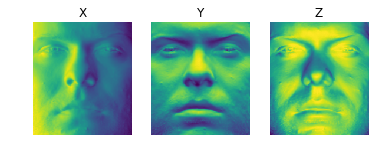

In [11]:
plot_surface_normals(surface_normals)

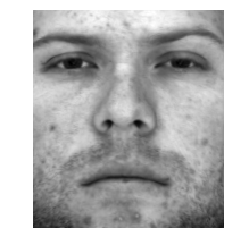

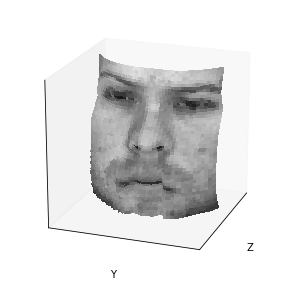

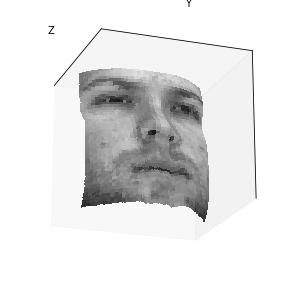

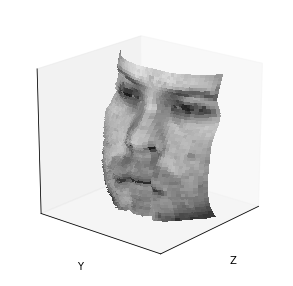

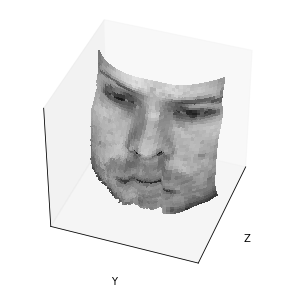

In [12]:
display_output(albedo_image, height_map_rand)
# display_output(albedo_image, height_map,40,20)

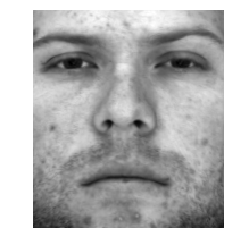

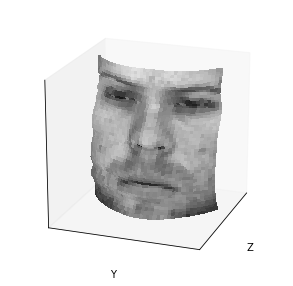

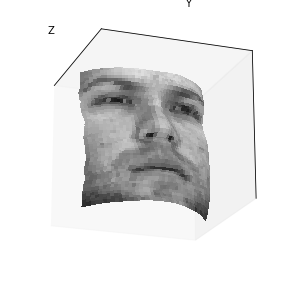

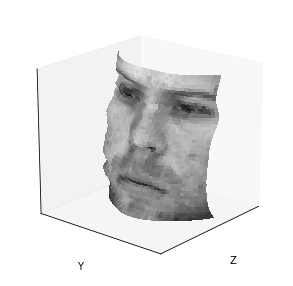

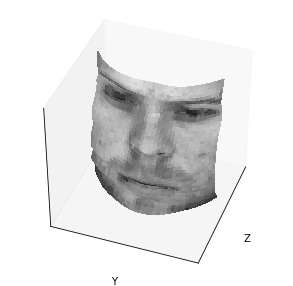

In [13]:
display_output(albedo_image, height_map_col)

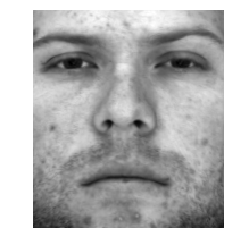

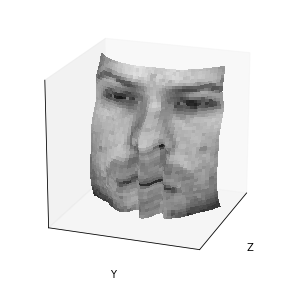

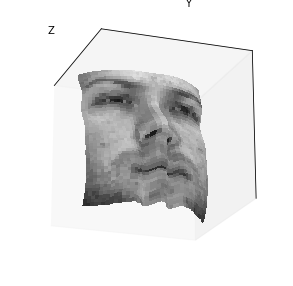

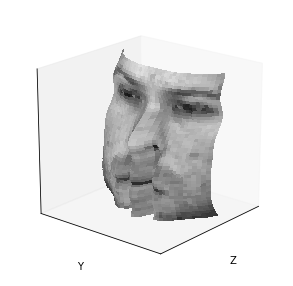

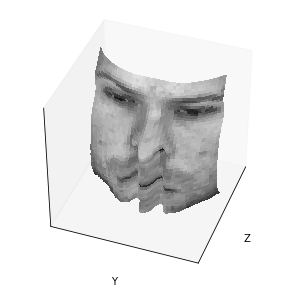

In [14]:
display_output(albedo_image, height_map_row)

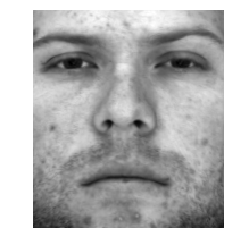

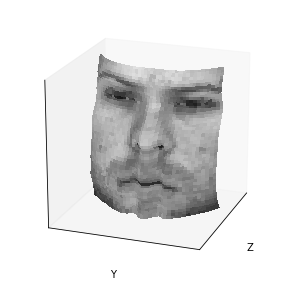

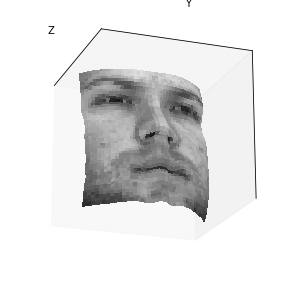

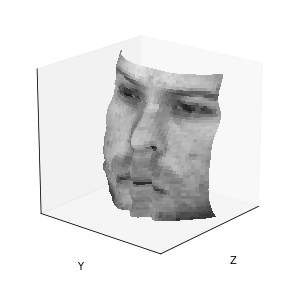

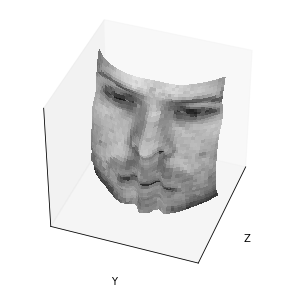

In [15]:
display_output(albedo_image, height_map) #average

F:\Study In UIUC\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


The excution time of  average is: 0.0029993057250976562


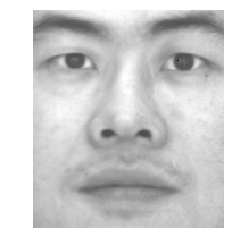

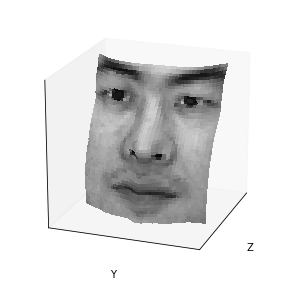

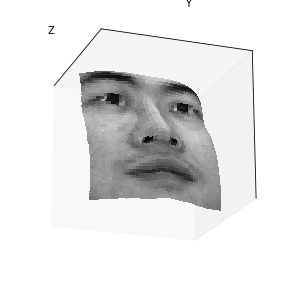

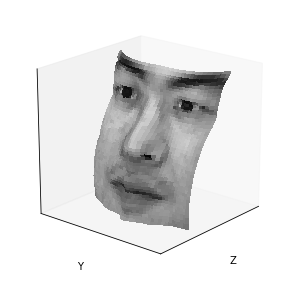

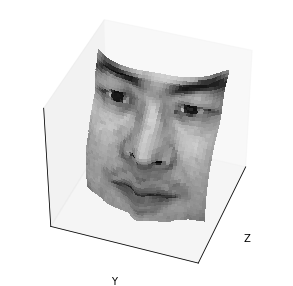

In [16]:
root_path = 'C:/Users/n551/Desktop/ECE549/MP/MP1/croppedyale/'
subject_name = 'yaleB02'
integration_method = 'average'
save_flag = True

full_path = '%s%s' % (root_path, subject_name)
ambient_image, imarray, light_dirs = LoadFaceImages(full_path, subject_name,
                                                    64)

processed_imarray = preprocess(ambient_image, imarray)

albedo_image, surface_normals = photometric_stereo(processed_imarray,light_dirs)
height_map = get_surface(surface_normals, integration_method)
if save_flag:
    save_outputs(subject_name, albedo_image, surface_normals)
display_output(albedo_image, height_map) #average

F:\Study In UIUC\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


The excution time of  average is: 0.00299835205078125


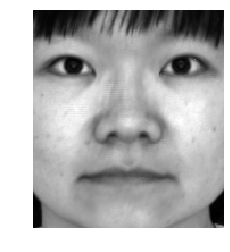

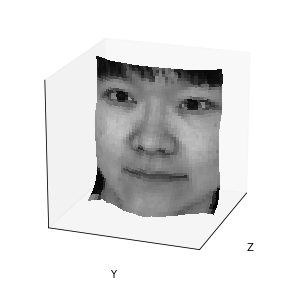

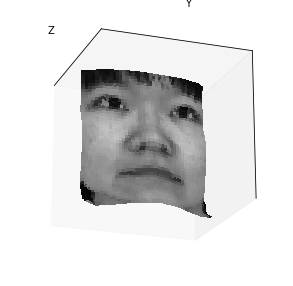

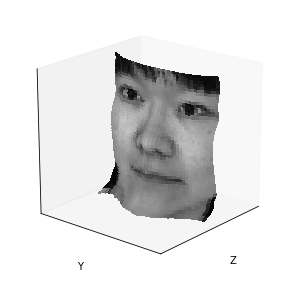

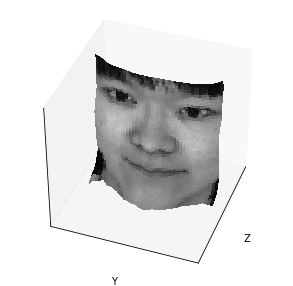

In [17]:
root_path = 'C:/Users/n551/Desktop/ECE549/MP/MP1/croppedyale/'
subject_name = 'yaleB05'
integration_method = 'average'
save_flag = True

full_path = '%s%s' % (root_path, subject_name)
ambient_image, imarray, light_dirs = LoadFaceImages(full_path, subject_name,
                                                    64)

processed_imarray = preprocess(ambient_image, imarray)

albedo_image, surface_normals = photometric_stereo(processed_imarray,light_dirs)
height_map = get_surface(surface_normals, integration_method)

if save_flag:
    save_outputs(subject_name, albedo_image, surface_normals)
display_output(albedo_image, height_map) #average

F:\Study In UIUC\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


The excution time of  average is: 0.002998828887939453


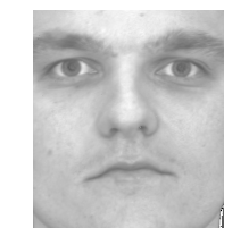

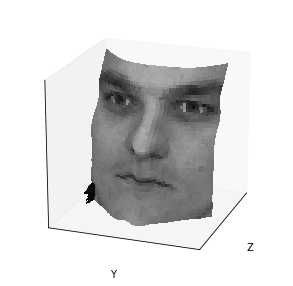

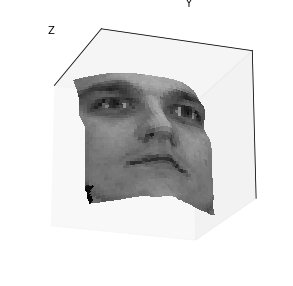

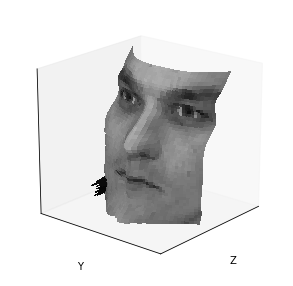

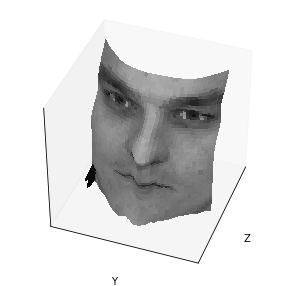

In [18]:
root_path = 'C:/Users/n551/Desktop/ECE549/MP/MP1/croppedyale/'
subject_name = 'yaleB07'
integration_method = 'average'
save_flag = True

full_path = '%s%s' % (root_path, subject_name)
ambient_image, imarray, light_dirs = LoadFaceImages(full_path, subject_name,
                                                    64)
processed_imarray = preprocess(ambient_image, imarray)
albedo_image, surface_normals = photometric_stereo(processed_imarray,light_dirs)
height_map = get_surface(surface_normals, integration_method)
if save_flag:
    save_outputs(subject_name, albedo_image, surface_normals)
display_output(albedo_image, height_map) #average